# Introduction

Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas.

# Import Dependencies

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import tensorflow as tf

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Load Data

Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). 

The file "sign_mnist_train.csv" contains 27,455 training examples and the file "sign_mnist_test.csv" contains 7172 testing examples. This dataset has approximately half the size of the original MNIST image dataset of handwritten digits, but it is otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [115]:
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


A couple of things to keep in mind:

1. The first line contains the column headers, so we should ignore it.
2. Each successive line contains 785 comma-separated values between 0 and 255
2.1. The first value is the label
2.2. The rest are the pixel values for that picture

We perform a grayscale normalization to reduce the effect of illumination's differences.
Moreover the NN converges faster on [0..1] data than on [0..255].

### Load Training Data

In [116]:
def load_train():
    
    # Training images
    X = np.array(train.drop(columns='label'))

    # Training labels
    y = np.array(train['label'])

    # Normalize the data
    # X = X / 255
    X = np.array(X, dtype="float") / 255.0
    
    return X, y

X, y = load_train()

# Number of training examples
m = len(y)

print("Number of training examples:", m)
print("Number of features:", X.shape[1])

Number of training examples: 27455
Number of features: 784


### Load Testing Data

In [117]:
def load_test():
    
    # Testing images
    X_test = np.array(test.drop(columns='label'))

    # Testing labels
    y_test = np.array(test['label'])

    # Normalize the data
    # X_test = X_test / 255
    X_test = np.array(X_test, dtype="float") / 255.0
    
    return X_test, y_test
    
X_test, y_test = load_test()

### View Data

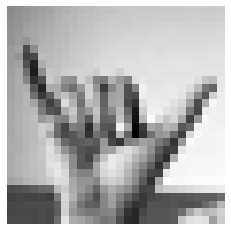

In [118]:
r = np.random.randint(0,27455)

if (r >= 0 and r < 27455):
    img = X[r].reshape((28, 28))
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()  

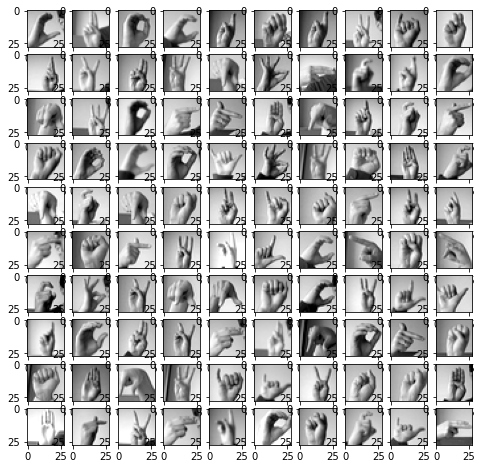

In [119]:
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        # Reshape back to 20x20 pixel image
        axis[i,j].imshow(X[np.random.randint(0,27455),:].reshape((28, 28)), cmap="gray") 

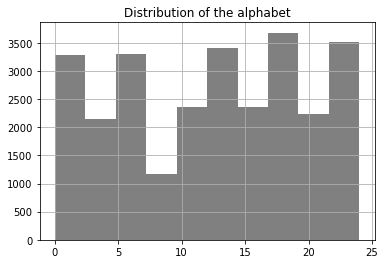

In [120]:
train.label.hist(color='grey',bins=10)
plt.title("Distribution of the alphabet")
plt.show()

# One-vs-All Classification

Here we implement one-vs-all classification by training multiple Regularized Logistic Regression classifiers, one for each of the K = 25 classes in the MNIST dataset.

It's worth noting that the implementation of algorithms like Logistic Regression in the scikit-learn library implements the OvR strategy (One-vs-Rest, also known as One-vs-All) by default when using these algorithms for multi-class classification.

In [121]:
# All parameters not specified are set to their defaults

# Penalty l2 stands for: Ridge Regression
# lbfgs stands for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm"

# Higher max_iter to make sure the algorithm converges

logisticRegr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
logisticRegr.fit(X, y)

predictions = logisticRegr.predict(X_test)
print("Predictions with testing data:", predictions)

Predictions with testing data: [ 6  5 10 ...  2  4  2]


## Measuring Model Performance

In [122]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.6919966536530954


## Confusion Matrix

A confusion matrix is a table that is used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. In this section, we use Seaborn and Matplotlib to make confusion matrices more understandable and visually appealing.

In [123]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 391   0  20   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0  19   0   0   0   0]
 [  0   0 287   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   0]
 [  0   0   0 210   0   0   0   0   0   0   0   0   0   0   0   0  18   0
    0   0   0   0  17   0]
 [  0   0   0   0 438   0   0   0   0   0   0   0  18   0   0   0   0  42
    0   0   0   0   0   0]
 [  0   0  21   0   0 226   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 255  14   0   0   0   0   0   0   0  33   0   0
   40   0   0   0   6   0]
 [  0   0   0   0   0   0  42 308  15   0   0  21   0   0   0   0   0   0
   25  21   0   0   4   0]
 [  0   0   0   0   0   0   0  19 169  17   0   2  20   0   0   0  21   0
    0   0   0   0   0  40]
 [  0   0   0   0   0  21   0   0  17 137   0   3   0   0  19   0  78  21
    0  13   0  22

### Seaborn

Text(0.5, 1.0, 'Accuracy Score: 0.6919966536530954')

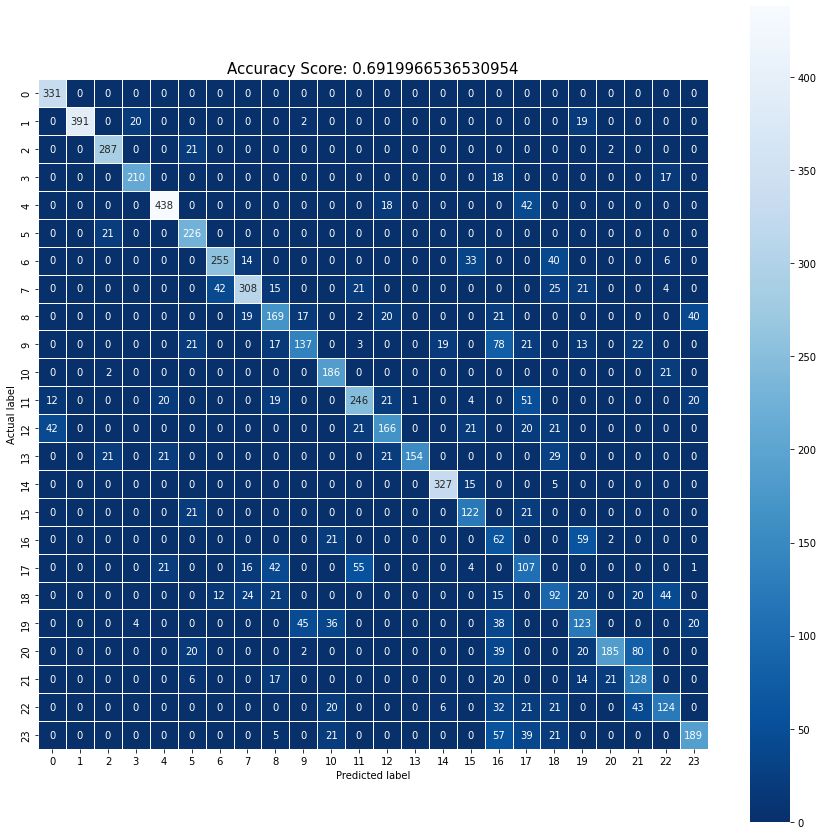

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Matplotlib

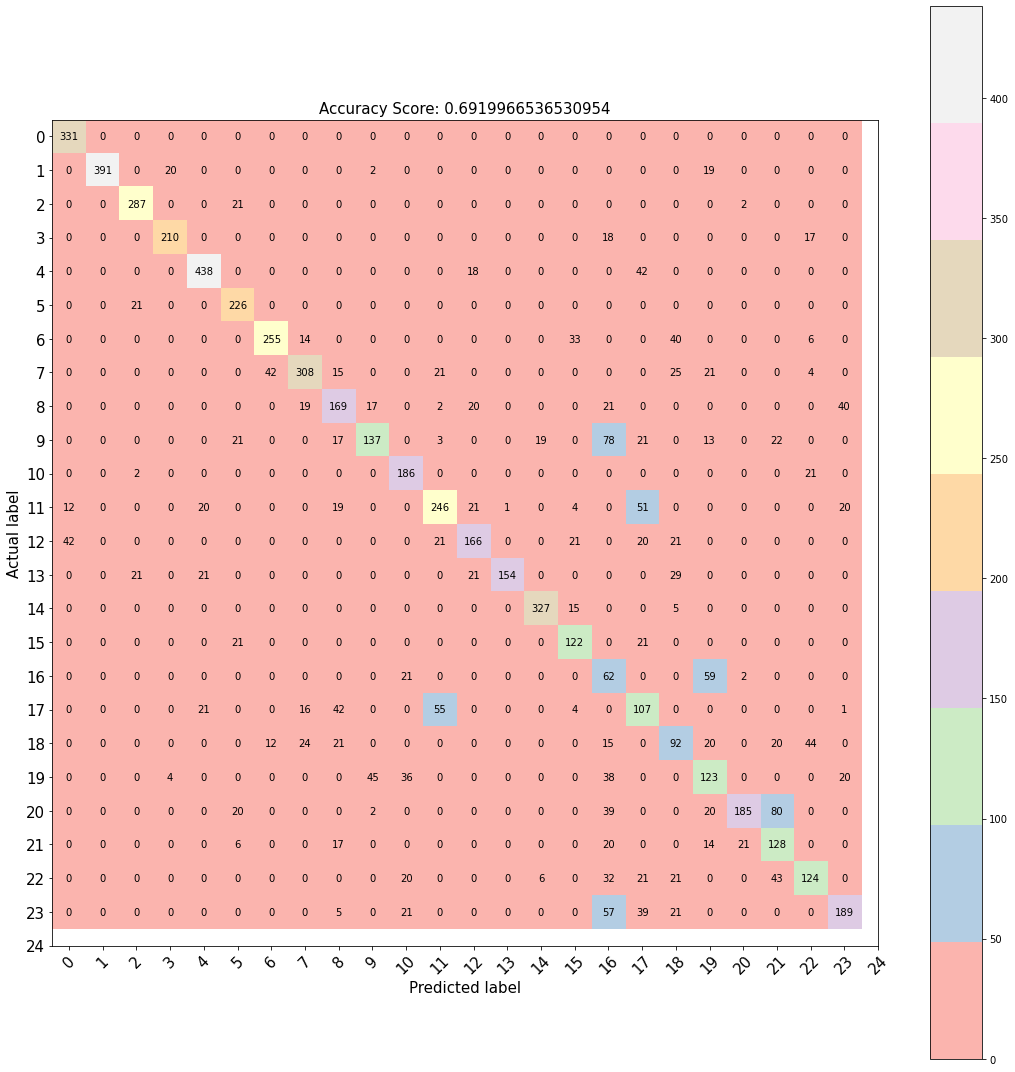

In [125]:
plt.figure(figsize=(15,15))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title(all_sample_title, size = 15)
plt.colorbar()
tick_marks = np.arange(25)
plt.xticks(tick_marks, rotation=45, size = 15)
plt.yticks(tick_marks, size = 15)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## Display Misclassified images with Predicted Labels

In [126]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

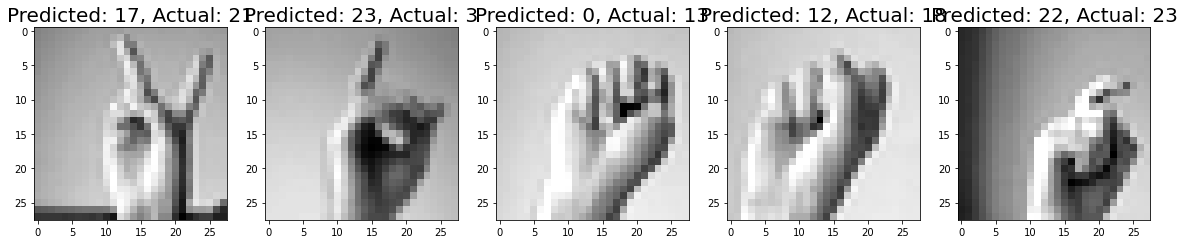

In [127]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 20)

# Logistic Regression with Backpropagation

TODO...


# Convolutional Neural Network

A convolution neural network is similar to a multi-layer perceptron network.The major differences are what the network learns, how they are structured and what purpose they are mostly used for. 

Convolutional neural networks were also inspired from biological processes, their structure has a semblance of the visual cortex present in an animal. CNNs are largely applied in the domain of computer vision and has been highly successful in achieving state of the art performance on various test cases.

The hidden layers in a CNN are generally convolution and pooling (downsampling) layers. In each convolution layer, we take a filter of a small size and move that filter across the image and perform convolution operations. Convolution operations are nothing but element-wise matrix multiplication between the filter values and the pixels in the image and the resultant values are summed.

## Prepare Data

We reshape the data because our CNN accepts only a four-dimensional vector. 

The value -1 represents the number of images in the training data, 28 represents the image size and 1 represents the number of channels. The number of channels is set to 1 if the image is in grayscale and if the image is in RGB format, the number of channels is set to 3. 

We also convert our target values into binary class matrices. To know what binary class matrices look like take a look at the example below:

Y = 2 # the value 2 represents that the image has label 2

Y = [0,0,1,0,0,0,0,0,0,0] # The 2nd position in the vector is made 1

In [144]:
X, y = load_train()
X_test, y_test = load_test()

batch_size = 32
num_classes = 25
epochs = 25

# Input image dimensions
img_rows, img_cols = 28, 28

# Reshaping the data from 1-D to 3-D as required through input by CNN's
X_reshaped = X.reshape(-1,28,28,1)
X_test_reshaped = X_test.reshape(-1,28,28,1)

# Convert class vectors to binary class matrices
y_class = np_utils.to_categorical(y, num_classes)
y_test_class = np_utils.to_categorical(y_test, num_classes)

## Build CNN 

We build a sequential model and add convolutional layers and max pooling layers to it.

We also add dropout layers in between, dropout randomly switches off some neurons in the network which forces the data to find new paths. Therefore, this reduces overfitting. We add dense layers at the end which are used for class prediction (0-25).

In [145]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(MaxPooling2D(pool_size=(4, 4)))
#model.add(Dropout(0.25))

# Flatten the data
model.add(Flatten())
# model.add(GlobalAveragePooling2D())

# Add a dense layer
# model.add(Dense(512, activation="relu"))

#Add dropout
#model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [146]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
  
    return model

We now compile the model with a categorical cross entropy loss function, Adadelta optimizer and an accuracy metric. We then fit the dataset to the model, i.e we train the model for 12 epochs. 

After training the model, we evaluate the loss and accuracy of the model on the test data and print it.

In [147]:
# model = create_model()
# model.compile(
#    optimizer='adam',
#    loss='sparse_categorical_crossentropy',
#    metrics=['accuracy'])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# model.fit(X_reshaped, y_class,
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1,
#          validation_data=(X_test_reshaped, y_test_class))

model.fit(X_reshaped, y_class,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/25
858/858 [==============================] - 33s 38ms/step - loss: 3.1933 - accuracy: 0.0637
Epoch 2/25
858/858 [==============================] - 31s 36ms/step - loss: 3.1495 - accuracy: 0.1405
Epoch 3/25
858/858 [==============================] - 31s 36ms/step - loss: 3.1066 - accuracy: 0.1790
Epoch 4/25
858/858 [==============================] - 31s 36ms/step - loss: 3.0522 - accuracy: 0.2314
Epoch 5/25
858/858 [==============================] - 31s 36ms/step - loss: 2.9839 - accuracy: 0.2828
Epoch 6/25
858/858 [==============================] - 31s 36ms/step - loss: 2.9000 - accuracy: 0.3308
Epoch 7/25
858/858 [==============================] - 31s 36ms/step - loss: 2.7985 - accuracy: 0.3580
Epoch 8/25
858/858 [==============================] - 34s 40ms/step - loss: 2.6802 - accuracy: 0.3796
Epoch 9/25
858/858 [==============================] - 32s 38ms/step - loss: 2.5505 - accuracy: 0.4109
Epoch 10/25
858/858 [==============================] - 31s 37ms/step - loss: 2.416

In [150]:
score = model.evaluate(X_test_reshaped, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.434678554534912
Test accuracy: 0.5874233245849609


The filter’s values are tuned through the iterative process of training and after a neural net has trained for certain number of epochs, these filters start to look out for various features in the image. 

# Support vector machines

TODO...

# References

Logistic Regression

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

CNN

https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f

https://towardsdatascience.com/convolutional-neural-networks-explained-how-to-successfully-classify-images-in-python-df829d4ba761

https://pub.towardsai.net/convolutional-neural-networks-cnns-tutorial-with-python-417c29f0403f
